In [59]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import (
    Policy,
    ema_logging,
    MultiprocessingEvaluator,
)

In [60]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [61]:
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [62]:
# pass the policies list to EMA workbench experiment runs #`1`
n_scenarios = 10000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

experiments, outcomes = results

 97%|████████████████████████████████████▉ | 2919/3000 [02:13<00:03, 24.25it/s][MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 10000 scenarios * 3 policies * 1 model(s) = 30000 experiments

100%|████████████████████████████████████| 30000/30000 [23:51<00:00, 20.96it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [63]:
print(pd.DataFrame(experiments))

       A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                           58  106.403683       1.5   0.977966  221.033689   
1                           74  342.321092       1.0   0.258279   32.275685   
2                            6  300.994587       1.0   0.651831   99.188821   
3                            5  321.701972      10.0   0.939421  180.185640   
4                           17   84.420450      10.0   0.280491  186.091752   
...                        ...         ...       ...        ...         ...   
29995                       55  186.718362       1.0   0.585152  196.944550   
29996                       74  217.928015       1.5   0.583951  184.067562   
29997                      111  268.846514      10.0   0.075516   51.040411   
29998                      112   48.200086      10.0   0.110505  138.921957   
29999                       16  173.416722      10.0   0.330512  145.644352   

      A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A

In [64]:
print(list(pd.DataFrame(experiments).columns))

['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2', 'scenario', 'policy', 'model']


In [65]:
print(pd.DataFrame(outcomes))

       A.1 Total Costs  A.1_Expected Number of Deaths  A.2 Total Costs  \
0         5.397251e+07                       0.000000     2.648700e+08   
1         5.397251e+07                       0.000000     6.903812e+08   
2         5.397251e+07                       0.000000     2.099609e+08   
3         5.397251e+07                       0.000000     2.014895e+07   
4         5.397251e+07                       0.000000     5.846372e+07   
...                ...                            ...              ...   
29995     0.000000e+00                       0.000000     4.350195e+06   
29996     0.000000e+00                       0.000000     2.985305e+07   
29997     2.250631e+09                       1.507697     0.000000e+00   
29998     1.843225e+09                       1.510428     0.000000e+00   
29999     3.269862e+07                       0.032248     0.000000e+00   

       A.2_Expected Number of Deaths  A.3 Total Costs  \
0                           0.218062     3.376085e+07 

Once our results obtained, we are able to analyse them using PRIM. First however, we need to clean our dataset as to exclude categorical parameters. Those parameters, such as wave height the various RfR parameters are only integers and thus cannot be represented with a range like other parameters.

[MainProcess/INFO] 30000 points remaining, containing 13403 cases of interest
[MainProcess/INFO] box mean (0.6666666666666666) does not meet threshold criteria (1 0.8),returning dump box


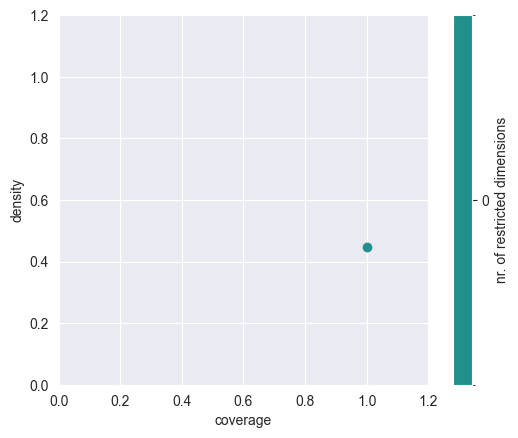

In [66]:
from ema_workbench.analysis import prim

df = pd.DataFrame(outcomes)
df_exp = pd.DataFrame(experiments)
x = df_exp[['A.1_Bmax', 'A.1_pfail', 'A.2_Bmax', 'A.2_pfail', 'A.3_Bmax', 'A.3_pfail', 'A.4_Bmax',  'A.4_pfail', 'A.5_Bmax', 'A.5_pfail']]


y= df['A.5 Total Costs']
y= y < 1000000

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha= 0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

C:\Users\tangu\PycharmProjects\MBDB\.venv\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:555: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(top=-0.5, bottom=nr_unc - 0.5)


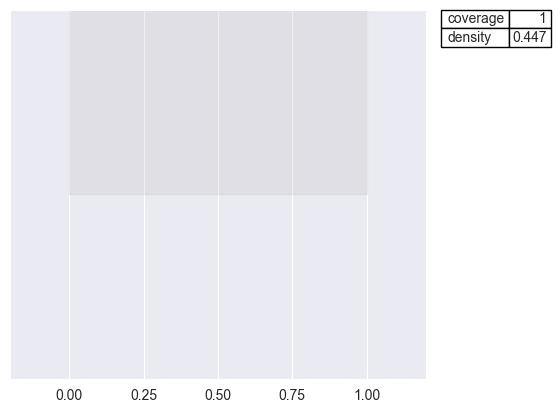

In [67]:
box1.inspect(style='graph')
plt.show()

In [68]:
box1.show_pairs_scatter(4)
plt.show()

IndexError: list index out of range

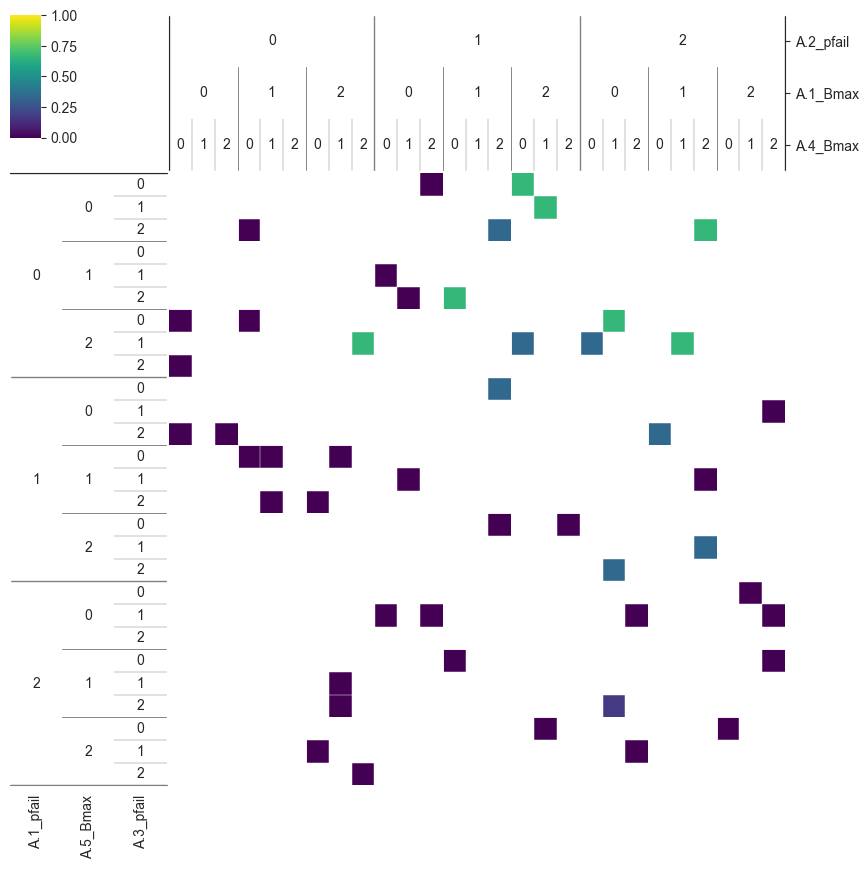

In [44]:
from ema_workbench.analysis import dimensional_stacking

x = df_exp[['A.1_Bmax', 'A.1_pfail', 'A.2_Bmax', 'A.2_pfail', 'A.3_Bmax', 'A.3_pfail', 'A.4_Bmax',  'A.4_pfail', 'A.5_Bmax', 'A.5_pfail']]
y = outcomes["A.5 Total Costs"] < 200000
dimensional_stacking.create_pivot_plot(x, y, 3, nbins=3)
plt.show()

In [ ]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style("white")

# model is the same across experiments
x = experiments.copy()
x = x.drop("model", axis=1)
y = outcomes["max_P"] < 0.8
fig = regional_sa.plot_cdfs(x, y)
sns.despine()
plt.show()